In [2]:
import librosa
import numpy as np
import pandas as pd
from sklearn import svm
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
'Just mfcc for this one'
def extract_mfcc(audio_file):
    y,sr = librosa.load(audio_file)
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr).T, axis=0)
    np.set_printoptions(linewidth=500)
    return mfccs

In [4]:
for i in extract_mfcc('fake.wav'):
    print(i)
#print(extract_mfcc('real.wav'))

-177.19553
137.56978
-30.787819
29.981653
-10.835986
12.140928
-16.022245
2.575813
-15.628394
-8.44202
-12.032128
-15.764258
-0.74084914
-11.272659
3.2525835
-13.844691
-7.820741
3.65998
-10.536233
-10.254777


In [27]:
import csv
import os
csv_file_training = 'training.csv'
csv_file_validation = 'valid.csv'
csv_file_test = 'test.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("audio_type")
l = []
for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/real')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)
    

100%|██████████| 6978/6978 [00:35<00:00, 197.86it/s]


In [28]:
dataf = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/validation/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/validation/fake/'+ f):
        l.append(n)
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/validation/real/')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/validation/real/'+ f):
        l.append(n)
    l.append("real")
    dataf.append(l)
    l = []
with open(csv_file_validation, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)
    

  0%|          | 0/1413 [00:00<?, ?it/s]

100%|██████████| 1413/1413 [00:06<00:00, 204.37it/s]


In [66]:
train_data = pd.read_csv("training.csv")
#train_data.head()
x = train_data[['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [69]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[0 1 1 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9928


In [70]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1347    7]
 [  13 1425]]

True Positives(TP) =  1347

True Negatives(TN) =  1425

False Positives(FP) =  7

False Negatives(FN) =  13


<Axes: >

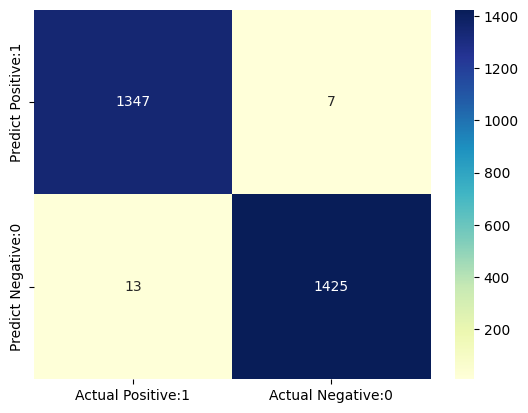

In [71]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
'using extra features 87 per extra feature'
y,fs = librosa.load('real.wav')
print(librosa.feature.zero_crossing_rate(y))
print(len(librosa.feature.zero_crossing_rate(y)[0]))
print(librosa.feature.spectral_centroid(y=y,sr=fs))
print(len(librosa.feature.spectral_centroid(y=y,sr=fs)[0]))
print(librosa.feature.spectral_bandwidth(y=y,sr=fs))
print(len(librosa.feature.spectral_bandwidth(y=y,sr=fs)[0]))

y,fs = librosa.load('fake.wav')
print(librosa.feature.zero_crossing_rate(y))
print(len(librosa.feature.zero_crossing_rate(y)[0]))
print(librosa.feature.spectral_centroid(y=y,sr=fs))
print(len(librosa.feature.spectral_centroid(y=y,sr=fs)[0]))
print(librosa.feature.spectral_bandwidth(y=y,sr=fs))
print(len(librosa.feature.spectral_bandwidth(y=y,sr=fs)[0]))


[[0.02392578 0.03662109 0.04931641 0.05664062 0.05761719 0.0546875  0.05371094 0.04882812 0.05029297 0.05322266 0.05517578 0.06201172 0.06298828 0.06542969 0.06494141 0.05761719 0.05175781 0.04980469 0.05078125 0.05175781 0.05712891 0.05859375 0.05175781 0.04492188 0.03320312 0.02929688 0.03710938 0.03613281 0.03613281 0.02929688 0.01855469 0.01953125 0.02734375 0.04150391 0.05078125 0.05566406 0.04980469 0.03564453 0.02636719 0.03320312 0.04882812 0.06152344 0.07763672 0.07763672 0.07617188
  0.07910156 0.06787109 0.05371094 0.0703125  0.11474609 0.18945312 0.2578125  0.3046875  0.31201172 0.27392578 0.23632812 0.16943359 0.10253906 0.07275391 0.04199219 0.05859375 0.06738281 0.05810547 0.06884766 0.17431641 0.31298828 0.46191406 0.55712891 0.43066406 0.29248047 0.1484375  0.04248047 0.03662109 0.03076172 0.03466797 0.04248047 0.05224609 0.06152344 0.0625     0.06787109 0.06933594 0.06152344 0.05029297 0.04003906 0.03125    0.02197266 0.01708984]]
87
[[1230.25926562 1225.14801213 1204

In [51]:
def extract_zcr1(audio_file):
    y,sr = librosa.load(audio_file)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T)
    return zcr
def extract_zcr2(audio_file):
    y,sr = librosa.load(audio_file)
    zcr = librosa.feature.zero_crossing_rate(y=y)
    return zcr[0]
def extract_centr(audio_file):
    y,sr = librosa.load(audio_file)
    centr = librosa.feature.spectral_centroid(y=y,sr=sr)
    return centr[0]
def extract_bandw(audio_file):
    y,sr = librosa.load(audio_file)
    bandw = librosa.feature.spectral_bandwidth(y=y,sr=sr)
    return bandw[0]

In [52]:

for n in extract_zcr2('real.wav'):
    print(n)
print("next")
for n in extract_mfcc("real.wav"):
    print(n)

print(extract_centr('real.wav'))
print(extract_bandw('real.wav'))

0.02392578125
0.03662109375
0.04931640625
0.056640625
0.0576171875
0.0546875
0.0537109375
0.048828125
0.05029296875
0.05322265625
0.05517578125
0.06201171875
0.06298828125
0.0654296875
0.06494140625
0.0576171875
0.0517578125
0.0498046875
0.05078125
0.0517578125
0.05712890625
0.05859375
0.0517578125
0.044921875
0.033203125
0.029296875
0.037109375
0.0361328125
0.0361328125
0.029296875
0.0185546875
0.01953125
0.02734375
0.04150390625
0.05078125
0.0556640625
0.0498046875
0.03564453125
0.0263671875
0.033203125
0.048828125
0.0615234375
0.07763671875
0.07763671875
0.076171875
0.0791015625
0.06787109375
0.0537109375
0.0703125
0.11474609375
0.189453125
0.2578125
0.3046875
0.31201171875
0.27392578125
0.236328125
0.16943359375
0.1025390625
0.07275390625
0.0419921875
0.05859375
0.0673828125
0.05810546875
0.06884765625
0.17431640625
0.31298828125
0.4619140625
0.55712890625
0.4306640625
0.29248046875
0.1484375
0.04248046875
0.03662109375
0.03076171875
0.03466796875
0.04248046875
0.05224609375
0.0615

In [54]:
import csv
import os
csv_file_training = 'trainingeverything.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
for i in range(87):
    headerList.append("zcr"+str(i+1))
for i in range(87):
    headerList.append("centr"+str(i+1))
for i in range(87):
    headerList.append("bandw"+str(i+1))

headerList.append("audio_type")
l = []
for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    for n in extract_zcr2('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    for n in extract_centr('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    for n in extract_bandw('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/real')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    for n in extract_zcr2('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    for n in extract_centr('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    for n in extract_bandw('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)


100%|██████████| 6978/6978 [01:27<00:00, 79.80it/s]


In [60]:
print(headerList)
hdl = headerList[0:(len(headerList)-1)]
print(hdl)

['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'zcr1', 'zcr2', 'zcr3', 'zcr4', 'zcr5', 'zcr6', 'zcr7', 'zcr8', 'zcr9', 'zcr10', 'zcr11', 'zcr12', 'zcr13', 'zcr14', 'zcr15', 'zcr16', 'zcr17', 'zcr18', 'zcr19', 'zcr20', 'zcr21', 'zcr22', 'zcr23', 'zcr24', 'zcr25', 'zcr26', 'zcr27', 'zcr28', 'zcr29', 'zcr30', 'zcr31', 'zcr32', 'zcr33', 'zcr34', 'zcr35', 'zcr36', 'zcr37', 'zcr38', 'zcr39', 'zcr40', 'zcr41', 'zcr42', 'zcr43', 'zcr44', 'zcr45', 'zcr46', 'zcr47', 'zcr48', 'zcr49', 'zcr50', 'zcr51', 'zcr52', 'zcr53', 'zcr54', 'zcr55', 'zcr56', 'zcr57', 'zcr58', 'zcr59', 'zcr60', 'zcr61', 'zcr62', 'zcr63', 'zcr64', 'zcr65', 'zcr66', 'zcr67', 'zcr68', 'zcr69', 'zcr70', 'zcr71', 'zcr72', 'zcr73', 'zcr74', 'zcr75', 'zcr76', 'zcr77', 'zcr78', 'zcr79', 'zcr80', 'zcr81', 'zcr82', 'zcr83', 'zcr84', 'zcr85', 'zcr86', 'zcr87', 'centr1', 'centr2', 'centr3', 'cen

In [61]:
train_data = pd.read_csv("trainingeverything.csv")
#train_data.head()
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [63]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[0 1 1 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9029


In [64]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[1251  103]
 [ 168 1270]]

True Positives(TP) =  1251

True Negatives(TN) =  1270

False Positives(FP) =  103

False Negatives(FN) =  168


<Axes: >

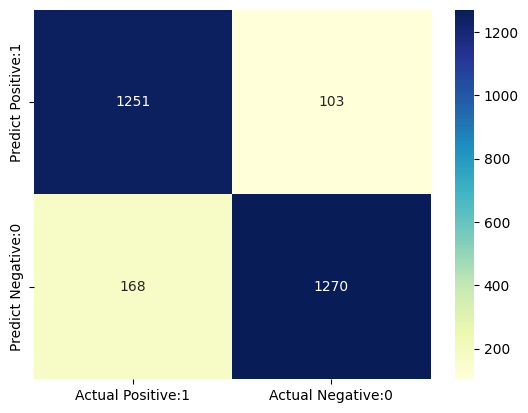

In [65]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
'start of same extra features but 1 val instead of 87 per'
def extract_zcr1(audio_file):
    y,sr = librosa.load(audio_file)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T)
    return zcr
def extract_centr2(audio_file):
    y,sr = librosa.load(audio_file)
    centr = np.mean(librosa.feature.spectral_centroid(y=y,sr=sr).T)
    return centr
def extract_bandw2(audio_file):
    y,sr = librosa.load(audio_file)
    bandw = np.mean(librosa.feature.spectral_bandwidth(y=y,sr=sr).T)
    return bandw

In [76]:
print(extract_zcr1('real.wav'))
print(extract_mfcc("real.wav"))

print(extract_centr2('real.wav'))
print(extract_bandw2('real.wav'))

0.09047234195402298
[-184.84773    121.67521    -43.255714    51.127403   -19.715673     4.0939927  -27.854925   -12.238566     3.568185    -1.4879526    3.2118964  -10.273731     5.965747    -7.739764    -5.578045    -7.4667997  -10.085554    -1.8637408   -8.283091    -6.4109764]
1703.1356858780546
1551.561531638598


In [ ]:
import csv
import os
csv_file_training = 'trainingeverything1val.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("zcr")
headerList.append("centr")
headerList.append("bandw")
headerList.append("audio_type")

l = []
for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    l.append(extract_zcr1('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_centr2('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_bandw2('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/real')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    l.append(extract_zcr1('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_centr2('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_bandw2('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)


100%|██████████| 6978/6978 [01:29<00:00, 77.56it/s]


In [79]:
hdl = headerList[0:(len(headerList)-1)]
train_data = pd.read_csv("trainingeverything1val.csv")
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [80]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [81]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[0 1 1 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9932


In [82]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1350    4]
 [  15 1423]]

True Positives(TP) =  1350

True Negatives(TN) =  1423

False Positives(FP) =  4

False Negatives(FN) =  15


<Axes: >

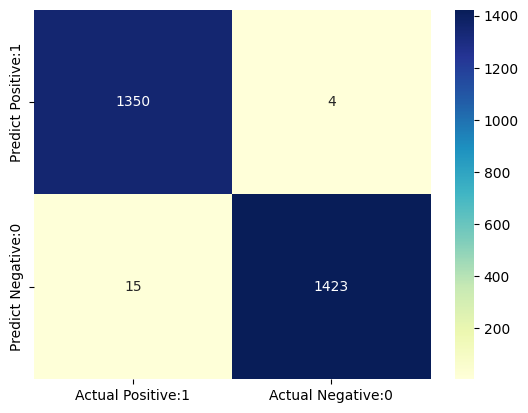

In [83]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [91]:
'forgot about other features haha'
y,fs = librosa.load('real.wav')
print(np.mean(librosa.feature.spectral_rolloff(y=y,sr=fs).T))
print(np.mean(librosa.feature.spectral_contrast(y=y,sr=fs).T))

3296.0651266163795
27.321905607808862


In [96]:
def extract_cont(audio_file):
    y,sr = librosa.load(audio_file)
    cont = np.mean(librosa.feature.spectral_contrast(y=y).T)
    return cont
def extract_rolloff(audio_file):
    y,sr = librosa.load(audio_file)
    rollo = np.mean(librosa.feature.spectral_rolloff(y=y,sr=sr).T)
    return rollo

In [98]:
print(extract_rolloff('real.wav'))
print(extract_cont('real.wav'))

3296.0651266163795
27.321905607808862


In [99]:
import csv
import os
csv_file_training = 'trainingallfeatextract.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("zcr")
headerList.append("centr")
headerList.append("bandw")
headerList.append("contrast")
headerList.append("rolloff")
headerList.append("audio_type")


l = []
for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    l.append(extract_zcr1('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_centr2('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_bandw2('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_cont('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_rolloff('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/real')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    l.append(extract_zcr1('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_centr2('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_bandw2('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_cont('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_rolloff('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)


100%|██████████| 6978/6978 [02:13<00:00, 52.33it/s]


In [102]:
hdl = headerList[0:(len(headerList)-1)]
train_data = pd.read_csv("trainingallfeatextract.csv")
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [104]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[0 1 1 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9957


In [105]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1350    4]
 [   8 1430]]

True Positives(TP) =  1350

True Negatives(TN) =  1430

False Positives(FP) =  4

False Negatives(FN) =  8


<Axes: >

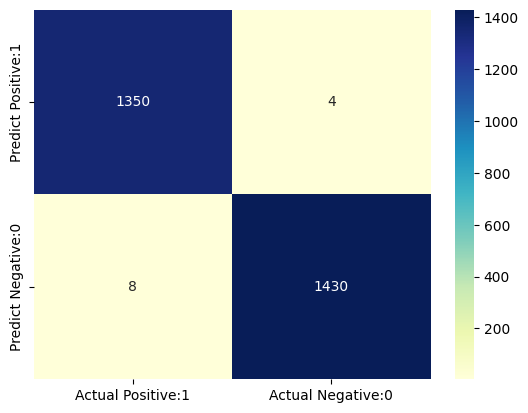

In [106]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [113]:
"adding chroma features"
y,fs = librosa.load('real.wav')
print(np.mean(librosa.feature.chroma_cens(y=y).T))
print(np.mean(librosa.feature.chroma_cqt(y=y,sr=fs).T))
print(np.mean(librosa.feature.chroma_stft(y=y).T))
print(np.mean(librosa.feature.chroma_vqt(y=y,sr=fs,intervals='ji5').T))
y,fs = librosa.load('fake.wav')
print(np.mean(librosa.feature.chroma_cens(y=y).T))
print(np.mean(librosa.feature.chroma_cqt(y=y,sr=fs).T))
print(np.mean(librosa.feature.chroma_stft(y=y).T))
print(np.mean(librosa.feature.chroma_vqt(y=y,sr=fs,intervals='ji5').T))

0.20515454
0.27847922
0.31155875
0.34316364
0.25596792
0.34789395
0.3057582
0.37496188


In [114]:
def extract_ccens(audio_file):
    y,sr = librosa.load(audio_file)
    ccens = np.mean(librosa.feature.chroma_cens(y=y).T)
    return ccens
def extract_ccqt(audio_file):
    y,sr = librosa.load(audio_file)
    ccqt = np.mean(librosa.feature.chroma_cqt(y=y,sr=fs).T)
    return ccqt 
def extract_cstft(audio_file):
    y,sr = librosa.load(audio_file)
    cstft = np.mean(librosa.feature.chroma_stft(y=y).T)
    return cstft
def extract_cvqt(audio_file):
    y,sr = librosa.load(audio_file)
    cvqt = np.mean(librosa.feature.chroma_vqt(y=y,sr=fs,intervals='ji5').T)
    return cvqt

In [115]:
print(extract_ccens('real.wav'))
print(extract_ccqt('real.wav'))
print(extract_cstft('real.wav'))
print(extract_cvqt('real.wav'))

0.20515454
0.27847922
0.31155875
0.34316364


c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


In [116]:
import csv
import os
csv_file_training = 'trainingwchroma.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("zcr")
headerList.append("centr")
headerList.append("bandw")
headerList.append("contrast")
headerList.append("rolloff")
headerList.append("ccens")
headerList.append("ccqt")
headerList.append("cstft")
headerList.append("cvqt")
headerList.append("audio_type")


l = []
for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/fake')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/fake/'+ f):
        l.append(n)
    l.append(extract_zcr1('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_centr2('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_bandw2('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_cont('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_rolloff('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_ccens('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_ccqt('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_cstft('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append(extract_cvqt('archive/for-2sec/for-2seconds/training/fake/'+ f))
    l.append("fake")
    dataf.append(l)
    l = []

for f in tqdm(os.listdir('archive/for-2sec/for-2seconds/training/real')):
    for n in extract_mfcc('archive/for-2sec/for-2seconds/training/real/'+ f):
        l.append(n)
    l.append(extract_zcr1('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_centr2('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_bandw2('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_cont('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_rolloff('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_ccens('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_ccqt('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_cstft('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append(extract_cvqt('archive/for-2sec/for-2seconds/training/real/'+ f))
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)


  1%|          | 86/6978 [00:15<20:40,  5.55it/s]c:\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 6978/6978 [20:55<00:00,  5.56it/s]


In [117]:
hdl = headerList[0:(len(headerList)-1)]
train_data = pd.read_csv("trainingwchroma.csv")
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [119]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[0 1 1 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9968


In [120]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1351    3]
 [   6 1432]]

True Positives(TP) =  1351

True Negatives(TN) =  1432

False Positives(FP) =  3

False Negatives(FN) =  6


<Axes: >

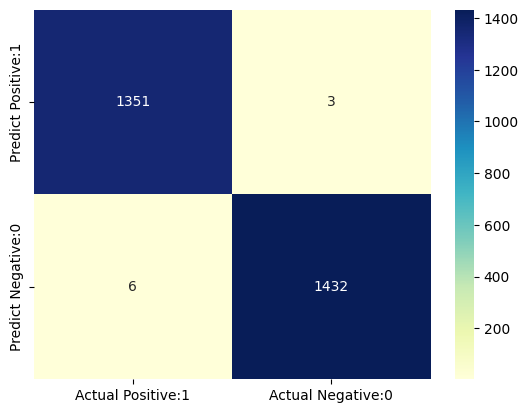

In [121]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')